##Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/My\ Drive/Google\ Colab\ Projects/gender-bias/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import json
import os
import pandas as pd

In [ ]:
# Change current working directory to Project folder in GDrive
os.chdir("/content/drive/MyDrive/Google Colab Projects/gender-bias")

In [ ]:
!ls

## RUN ONCE: download global-news-dataset and unzip to directory
!curl -L -o global-news-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/everydaycodings/global-news-dataset
!unzip global-news-dataset.zip -d global-news-dataset


crime-law-justice-positive  crime-law-justice-positive.zip
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  399M  100  399M    0     0  9535k      0  0:00:42  0:00:42 --:--:-- 9202k
Archive:  global-news-dataset.zip
  inflating: global-news-dataset/data.csv  
  inflating: global-news-dataset/rating.csv  
  inflating: global-news-dataset/raw-data.csv  


In [ ]:
def load_news_dataset(filepath='global-news-dataset/data.csv'):
    """
    Load dataset from Kaggle's "Global News Dataset"
    Source: https://www.kaggle.com/datasets/everydaycodings/global-news-dataset/data?select=rating.csv
    """
    df = pd.read_csv(filepath)
    return df

In [ ]:
df = load_news_dataset()
df.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content
0,89541,NaN,International Business Times,Paavan MATHEMA,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,https://www.ibtimes.com/un-chief-urges-world-s...,https://d.ibtimes.com/en/full/4496078/nepals-g...,2023-10-30 10:12:35.000000,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...
1,89542,NaN,Prtimes.jp,NaN,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,https://prtimes.jp/main/html/rd/p/000000147.00...,https://prtimes.jp/i/32220/147/ogp/d32220-147-...,2023-10-06 04:40:02.000000,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,NaN
2,89543,NaN,VOA News,webdesk@voanews.com (Agence France-Presse),UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,https://www.voanews.com/a/un-chief-urges-world...,https://gdb.voanews.com/01000000-0a00-0242-60f...,2023-10-30 10:53:30.000000,"Kathmandu, Nepal UN Secretary-General Antonio...",Nepal,NaN
3,89545,NaN,The Indian Express,Editorial,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,https://indianexpress.com/article/opinion/edit...,https://images.indianexpress.com/2023/10/edit-...,2023-10-06 01:20:24.000000,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...
4,89547,NaN,The Times of Israel,Jacob Magid,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...",https://www.timesofisrael.com/200-foreigners-d...,https://static.timesofisrael.com/www/uploads/2...,2023-10-27 01:08:34.000000,"Scores of foreign citizens were killed, taken ...",Nepal,NaN


## Initial Analysis

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.shape

(105375, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105375 entries, 0 to 105374
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   article_id    105375 non-null  int64 
 1   source_id     24495 non-null   object
 2   source_name   105375 non-null  object
 3   author        97156 non-null   object
 4   title         105335 non-null  object
 5   description   104992 non-null  object
 6   url           105375 non-null  object
 7   url_to_image  99751 non-null   object
 8   published_at  105375 non-null  object
 9   content       105375 non-null  object
 10  category      105333 non-null  object
 11  full_content  58432 non-null   object
dtypes: int64(1), object(11)
memory usage: 9.6+ MB


In [ ]:
df.isna().sum()

,0
article_id,0
source_id,80880
source_name,0
author,8219
title,40
description,383
url,0
url_to_image,5624
published_at,0
content,0


In [ ]:
# remove columns with a lot of NaN or ones that are not essential
df = df[['title', 'description', 'content', 'source_name', 'published_at']]

df.isna().sum()

,0
title,40
description,383
content,0
source_name,0
published_at,0


In [ ]:
# drop rows with no values
df = df.dropna()
df.shape

(104975, 5)

In [ ]:
df.duplicated().sum()

3690

In [ ]:
df = df.drop_duplicates()
df.shape

(101285, 5)

In [ ]:
# title wordcloud
wc = WordCloud(width=600,height=300).generate(' '.join(df.title))
plt.imshow(wc);

NameError: name 'WordCloud' is not defined

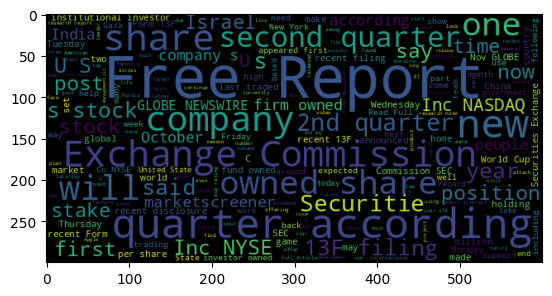

In [ ]:
# description wordcloud
wc = WordCloud(width=600,height=300).generate(' '.join(df.description))
plt.imshow(wc);

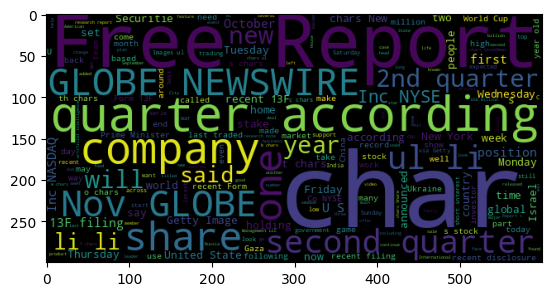

In [ ]:
# content wordcloud
wc = WordCloud(width=600,height=300).generate(' '.join(df.content))
plt.imshow(wc);

In [ ]:
# add columns to store title, description, and content lengths
df['title_len'] = df['title'].apply(len)
df['description_len'] = df['description'].apply(len)
df['content_len'] = df['content'].apply(len)

<ipython-input-27-a3a12533cfa0>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='content_len', ylabel='Density'>

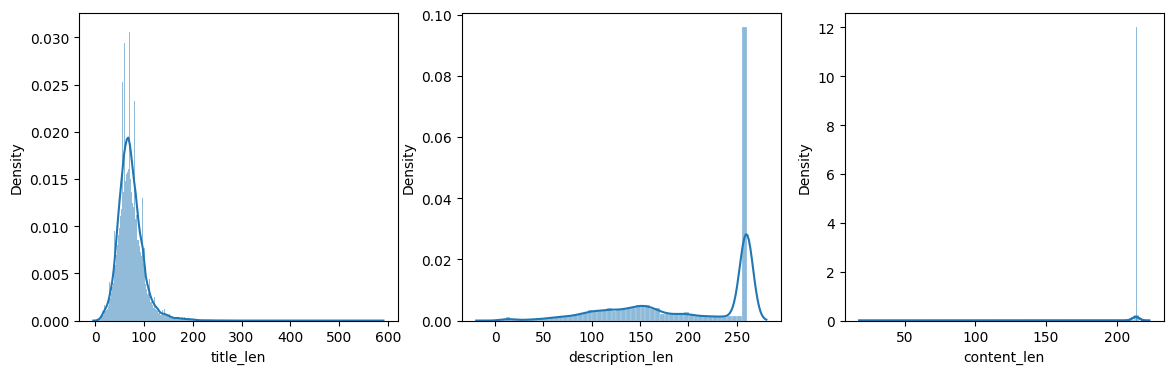

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(14,4))
sns.histplot(
    df["title_len"],
    ax=axes[0], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.5, edgecolor=(1, 1, 1, .4),
)
sns.histplot(
    df["description_len"],
    ax=axes[1], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.5, edgecolor=(1, 1, 1, .4),
)
sns.histplot(
    df["content_len"],
    ax=axes[2], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.5, edgecolor=(1, 1, 1, .4),
)
sns.distplot(
    df["content_len"], ax=axes[2]
)

In [ ]:
df.describe()

,title_len,description_len,content_len
count,101285.000000,101285.000000,101285.000000
mean,72.457590,199.827684,209.092284
std,26.364282,68.479348,23.569647
min,4.000000,1.000000,25.000000
25%,56.000000,143.000000,213.000000
50%,69.000000,239.000000,214.000000
75%,85.000000,260.000000,214.000000
max,583.000000,260.000000,216.000000


from matplotlib import pyplot as plt
_df_0['title_len'].plot(kind='hist', bins=20, title='title_len')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['description_len'].plot(kind='hist', bins=20, title='description_len')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['content_len'].plot(kind='hist', bins=20, title='content_len')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='title_len', y='description_len', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='description_len', y='content_len', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['title_len'].plot(kind='line', figsize=(8, 4), title='title_len')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['description_len'].plot(kind='line', figsize=(8, 4), title='description_len')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['content_len'].plot(kind='line', figsize=(8, 4), title='content_len')
plt.gca().spines[['top', 'right']].set_visible(False)

Key metrics:
- max_title_len = 583
- max_description_len = 260
- max_content_len = 260

In [ ]:
import numpy as np

for i in np.arange(0.9,1.0,0.01):
    print(f"{i} percentile value of title length is ",df['title_len'].quantile(i))
    print(f"{i} percentile value of description length is ",df['description_len'].quantile(i))
    print(f"{i} percentile value of content length is ",df['content_len'].quantile(i))

0.9 percentile value of title length is  102.0
0.9 percentile value of description length is  260.0
0.9 percentile value of content length is  214.0
0.91 percentile value of title length is  104.0
0.91 percentile value of description length is  260.0
0.91 percentile value of content length is  214.0
0.92 percentile value of title length is  106.0
0.92 percentile value of description length is  260.0
0.92 percentile value of content length is  214.0
0.93 percentile value of title length is  109.0
0.93 percentile value of description length is  260.0
0.93 percentile value of content length is  214.0
0.9400000000000001 percentile value of title length is  112.0
0.9400000000000001 percentile value of description length is  260.0
0.9400000000000001 percentile value of content length is  214.0
0.9500000000000001 percentile value of title length is  117.0
0.9500000000000001 percentile value of description length is  260.0
0.9500000000000001 percentile value of content length is  214.0
0.96000

In [ ]:
# Drop 'content' column from dataset

df = df[['title', 'description', 'title_len', 'description_len', 'source_name', 'published_at']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101285 entries, 0 to 105374
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   title            101285 non-null  object
 1   description      101285 non-null  object
 2   title_len        101285 non-null  int64 
 3   description_len  101285 non-null  int64 
 4   source_name      101285 non-null  object
 5   published_at     101285 non-null  object
dtypes: int64(2), object(4)
memory usage: 5.4+ MB


## Text Pre-processing and EDA

1. Tokenizing: Splits words into tokens

2. Lemmatizing: Breaks words into their root format

3. Removal of stop words: Takes off unnecessary words such as "the," "he," "she," etc.

4. Removal of punctuations: Takes off unessential word elements such as comma, period, brackets, parenthesis, etc

In [ ]:
# Import libraries for preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
bias_word_dictionaries = dict()

# Assumption: used os.chdir() earlier to change working directory to project GDrive folder
with open('archive/word_dictionaries.json', 'r') as f:
  bias_word_dictionaries = json.loads(f.read())

# Load our gender-related word dictionaries
female_bias_words = set(bias_word_dictionaries["female_bias_words"])
female_words = set(bias_word_dictionaries["female_words"])
empowerment_words = set(bias_word_dictionaries["empowerement"])

In [ ]:
# Text preprocessing function
def preprocess_text(text):
    """Clean and preprocess text data"""
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()

        # Remove special characters and digits
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Tokenize
        tokens = word_tokenize(text)

        # Remove stopwords and lemmatize
        lemmatizer = WordNetLemmatizer()
        stop_words = set(stopwords.words('english'))
        tokens = [lemmatizer.lemmatize(token) for token in tokens
                 if token not in stop_words]

        # Return space separated pre-processed text
        return ' '.join(tokens)
    # If not string, return empty string
    return ''

In [ ]:
# Feature extraction functions
def extract_gender_features(text):
    """Extract gender-related features from text"""
    if not isinstance(text, str):
        return pd.Series({
            'female_bias_ratio': 0,
            'female_mention_ratio': 0,
            'empowerment_ratio': 0
        })

    words = text.lower().split()
    total_words = len(words) if words else 1

    return pd.Series({
        'female_bias_ratio': sum(1 for w in words if w in female_bias_words) / total_words,
        'female_mention_ratio': sum(1 for w in words if w in female_words) / total_words,
        'empowerment_ratio': sum(1 for w in words if w in empowerment_words) / total_words
    })


> NOTE: we are proceeding with bias features for only the `cleaned_description` column.
If time permits, it might be worthwhile to change the pipeline to use title and compare.

In [ ]:
# Prepare the dataset
def prepare_dataset():
    global df

    # Preprocess text
    print("Preprocessing articles...")
    df['cleaned_content'] = df['content'].apply(preprocess_text)
    df['cleaned_title'] = df['title'].apply(preprocess_text)
    df['cleaned_description'] = df['description'].apply(preprocess_text)


    # NOTE: we are proceeding with bias features for only the `cleaned_description` column.
    # If time permits, it might be worthwhile to change the pipeline to use title and compare.
    # Extract features
    print("Extracting gender-related features...")
    gender_features = df['cleaned_content'].apply(extract_gender_features)
    df = pd.concat([df, gender_features], axis=1)

    # Create binary labels for high gender bias
    df['high_bias'] = (df['female_bias_ratio'] > df['female_bias_ratio'].mean()) & \
                     (df['empowerment_ratio'] < df['empowerment_ratio'].mean())

    return df

In [ ]:
# Analyze gender bias
def analyze_gender_bias(df):
    """Analyze gender bias patterns in the dataset"""

    # Basic statistics
    stats = {
        'total_articles': len(df),
        'avg_female_bias': df['female_bias_ratio'].mean(),
        'avg_female_mention': df['female_mention_ratio'].mean(),
        'avg_empowerment': df['empowerment_ratio'].mean(),
        'high_bias_percentage': (df['high_bias'].sum() / len(df)) * 100
    }

    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Distribution of female bias ratio
    sns.histplot(df['female_bias_ratio'], ax=axes[0,0], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.5, edgecolor=(1, 1, 1, .4),)
    axes[0,0].set_title('Distribution of Female Bias Ratio')

    # Distribution of empowerment ratio
    sns.histplot(df['empowerment_ratio'], ax=axes[0,1], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.5, edgecolor=(1, 1, 1, .4))
    axes[0,1].set_title('Distribution of Empowerment Ratio')

    # Female mention vs Empowerment scatter
    sns.scatterplot(data=df, x='female_mention_ratio', y='empowerment_ratio', ax=axes[1,0])
    axes[1,0].set_title('Female Mentions vs Empowerment')

    # High bias articles by source (top 10 sources)
    bias_by_source = df.groupby('source_name')['high_bias'].mean().sort_values(ascending=False)[:10]
    sns.barplot(x=bias_by_source.values, y=bias_by_source.index, ax=axes[1,1])
    axes[1,1].set_title('Gender Bias by News Source')

    plt.tight_layout()

    return stats, fig

In [ ]:
# Long-running preprocessing
df = prepare_dataset()

Preprocessing articles...
Extracting gender-related features...


In [ ]:
df.head()

,title,description,content,source_name,published_at,title_len,description_len,content_len,cleaned_content,cleaned_title,cleaned_description,female_bias_ratio,female_mention_ratio,empowerment_ratio,high_bias
0,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,UN Secretary-General Antonio Guterres urged th...,International Business Times,2023-10-30 10:12:35.000000,60,226,214,un secretarygeneral antonio guterres urged wor...,un chief urge world stop madness climate change,un secretarygeneral antonio guterres urged wor...,0.0,0.0,0.0,False
1,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Prtimes.jp,2023-10-06 04:40:02.000000,37,152,204,randebooweb autumn winter nepal handmade ram v...,randeboo,ainer randebooweb autumn winter nepal handmade...,0.0,0.0,0.0,False
2,UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,"Kathmandu, Nepal UN Secretary-General Antonio...",VOA News,2023-10-30 10:53:30.000000,60,260,214,kathmandu nepal un secretarygeneral antonio gu...,un chief urge world stop madness climate change,un secretarygeneral antonio guterres urged wor...,0.0,0.0,0.0,False
3,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,At least 14 persons lost their lives and more ...,The Indian Express,2023-10-06 01:20:24.000000,76,195,214,least person lost life others including army p...,sikkim warning hydroelectricity push must acco...,ecologist caution adverse effect dam construct...,0.0,0.0,0.0,False
4,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...","Scores of foreign citizens were killed, taken ...",The Times of Israel,2023-10-27 01:08:34.000000,85,260,213,score foreign citizen killed taken hostage lis...,foreigner dual national cut hamas assault here,france lost citizen thailand u ukraine russia ...,0.0,0.0,0.0,False


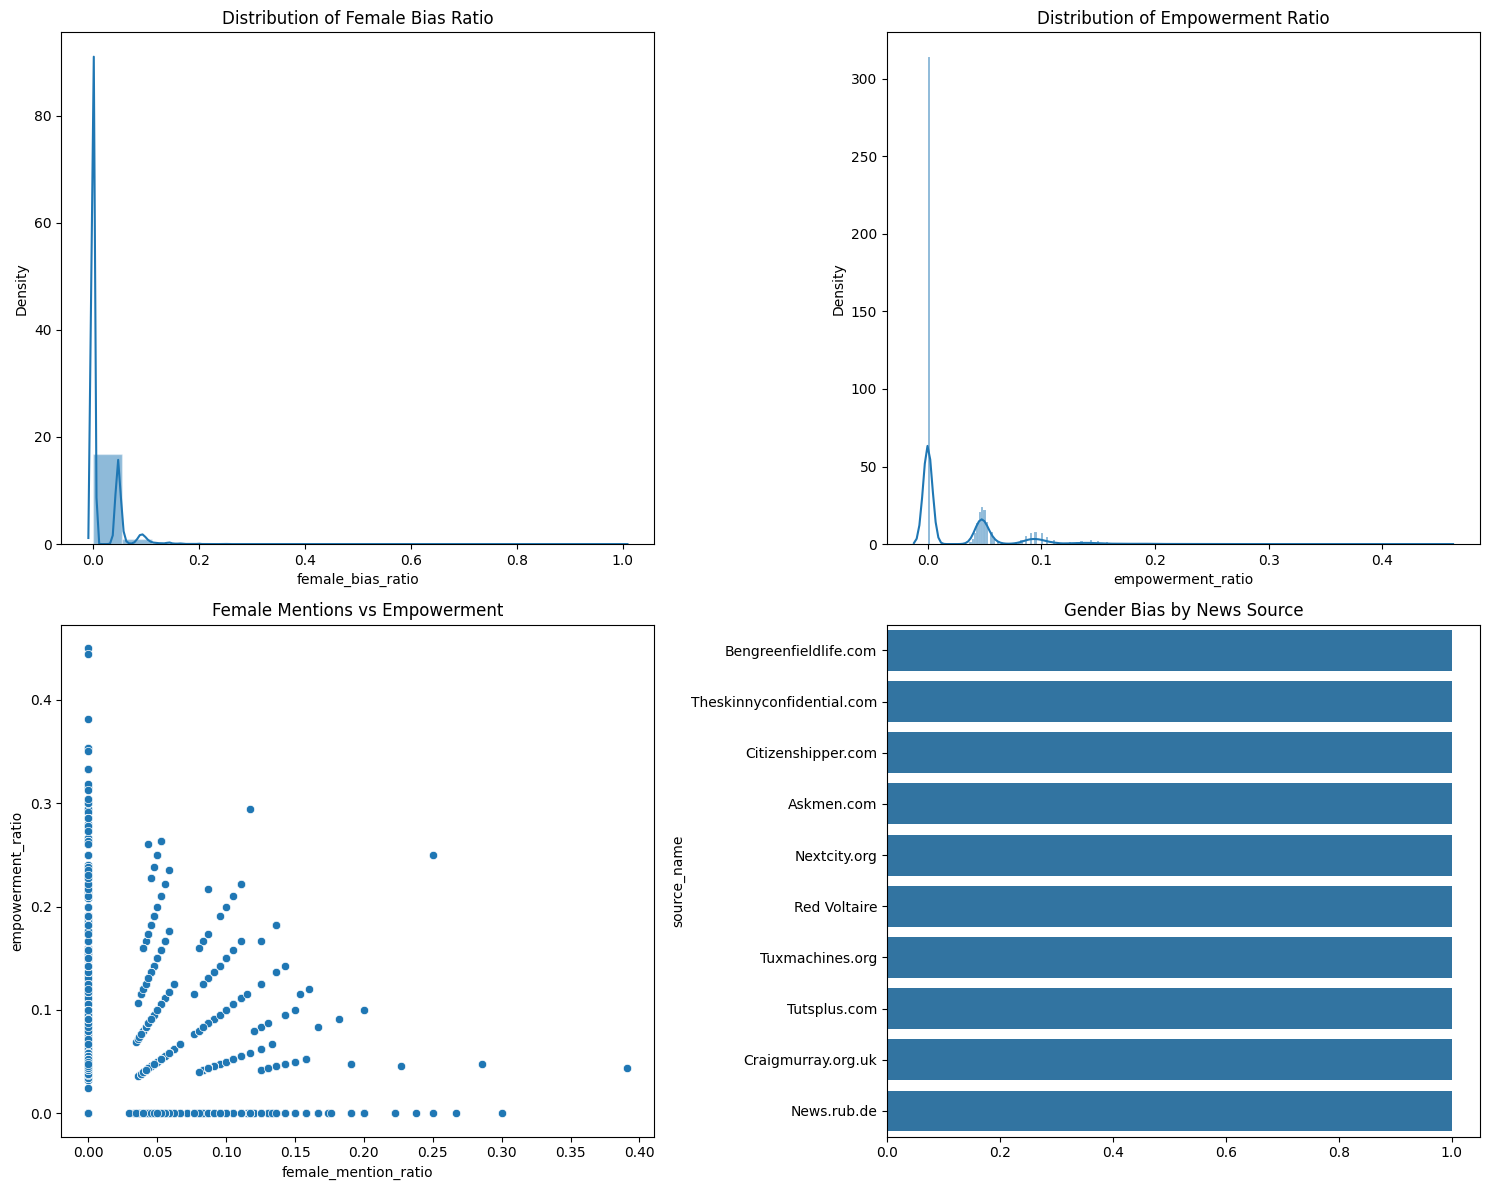

In [ ]:
# Analyze bias
stats, fig = analyze_gender_bias(df)

In [ ]:
print("\nDataset Statistics:")
for key, value in stats.items():
    print(f"{key}: {value:.2f}")


Dataset Statistics:
total_articles: 101285.00
avg_female_bias: 0.01
avg_female_mention: 0.00
avg_empowerment: 0.03
high_bias_percentage: 17.50


##Model Training

In [ ]:
# Import libraries for training
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)

# Train a simple classifier
def train_bias_classifier(df):
    """Train a classifier to predict gender bias in articles"""

    # Prepare features
    X_text = vectorizer.fit_transform(df['cleaned_content'])

    # Combine with numerical features
    X_numerical = df[['female_bias_ratio', 'female_mention_ratio', 'empowerment_ratio']]
    X = np.hstack([X_text.toarray(), X_numerical])

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, df['high_bias'], test_size=0.2, random_state=42
    )

    # Train model
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    # Evaluate
    y_pred = model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Get feature importance
    feature_names = vectorizer.get_feature_names_out().tolist() + [
        'female_bias_ratio', 'female_mention_ratio', 'empowerment_ratio'
    ]

    importance = pd.DataFrame({
        'feature': feature_names,
        'importance': abs(model.coef_[0])
    }).sort_values('importance', ascending=False)

    return model, importance.head(20)

In [ ]:
# Train and evaluate model
model, top_features = train_bias_classifier(df)
print("\nTop predictive features for gender bias:")
print(top_features)


Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.99      0.98     16665
        True       0.95      0.88      0.91      3592

    accuracy                           0.97     20257
   macro avg       0.96      0.93      0.95     20257
weighted avg       0.97      0.97      0.97     20257


Top predictive features for gender bias:
                feature  importance
1000  female_bias_ratio   55.438385
1002  empowerment_ratio   45.629331
795               share   13.175421
325               first   10.371048
960              wealth    9.974909
119            business    9.686257
241            director    8.759680
560            minister    8.212395
984                work    7.819865
377               great    6.450178
141                 ceo    6.448886
636              parent    6.028146
864             support    5.564367
106               board    5.122078
676               power    5.115386
855              strong    5.07

In [ ]:
def get_recommendations(features):
    recommendations = []

    if features['female_bias_ratio'] > 0.1:
        recommendations.append("Consider reducing stereotypical gender-associated terms")
    if features['empowerment_ratio'] < 0.05:
        recommendations.append("Consider including more empowerment-related terms")

    return recommendations

In [ ]:
# To analyze a new article
def analyze_new_article(article_text, model, vectorizer):
    # Preprocess
    cleaned_text = preprocess_text(article_text)

    # Extract features
    features = extract_gender_features(cleaned_text)

    # Get prediction
    text_features = vectorizer.transform([cleaned_text])
    X = np.hstack([text_features.toarray(), features.values.reshape(1, -1)])

    bias_probability = model.predict_proba(X)[0][1]

    return {
        'bias_probability': bias_probability,
        'feature_analysis': features,
        'recommendation': get_recommendations(features)
    }

In [ ]:
article_text_for_testing = "Weeks after her election defeat, Vice President Kamala Harris continues to solicit donations through frequent fundraising emails. Critics claim the aggressive approach is alienating supporters while raising questions about her campaign’s financial management. Emails from Harris’ team, dubbed the \"Harris Fight Fund,\" have urged donors to contribute immediately, warning of the urgent need to counteract President-elect Donald Trump’s nominations and policies."

article_text_for_testing = 'President Trump used Wednesday night\'s rally in Michigan as a chance to take aim at his 2016 presidential rival Hillary Clinton, as well as a slew of other Democrats, as the U.S. House back in Washington voted along party lines to impeach him. Trump addressed thousands of supporters who waited out in the cold to attend his “Merry Christmas” rally in Battle Creek. About 40 minutes after the rally began, the Democrat-controlled House voted – without any Republican support – to impeach Trump for "abuse of power" and "obstruction of Congress" related to his dealings with Ukraine.'
analyze_new_article(article_text_for_testing, model, vectorizer)

{'bias_probability': 0.10126106738893527,
 'feature_analysis': female_bias_ratio       0.035714
 female_mention_ratio    0.000000
 empowerment_ratio       0.035714
 dtype: float64,
 'recommendation': ['Consider including more empowerment-related terms']}

In [ ]:
drive.flush_and_unmount()